In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import tqdm
import matplotlib as mpl
import sys

sys.path.append('../pipeline_scripts/')
from pipeline_main import pipeline, serialize_dictionary, dist, calc_ang, sink_positions, dist
from pipeline_2D import to_osyris_ivs
from plotting_setup import *

In [253]:
s13_sF = serialize_dictionary(filename = 's13_09_servoF_cell_level.pkl', store = False)
s13_a4 = serialize_dictionary(filename = 's13_09_4_cell_level.pkl', store = False)
s13_mc3 = serialize_dictionary(filename = 's13_mcreat3_cell_level.pkl', store = False)
s13_om1 = serialize_dictionary(filename = 's13_omega1_cell_level.pkl', store = False)

In [248]:
hist2plot = np.zeros((len(time), 4))

def plot_simple_celllv(data, title, lvmax = 20):
    factor = [0.5, 1, 2, 4]
    time = data['time']
    array2plot = np.zeros((len(time), 4))

    for i in range(len(time)):
        for j, r in enumerate(np.array([4,8,16,32])):
            try:
                array2plot[i,j] = np.sum(data['radii_hist'][i][r] == lvmax)
            except: 
                continue

    fig, axs = plt.subplots(figsize = (10, 5))

    axs.set(ylabel = 'maxlv cells [n]', xlabel = 'Time [kyr]', ylim = (100, 2e5))
    for i in range(4):
        axs.semilogy(time*1e-3, array2plot[:,i], label = f'{factor[i]} acc. radius')
    plt.legend(frameon = False, bbox_to_anchor = ( 1.3,1.1), loc = 'upper right')
    fig.suptitle(title, y =.92)
    plt.tight_layout()

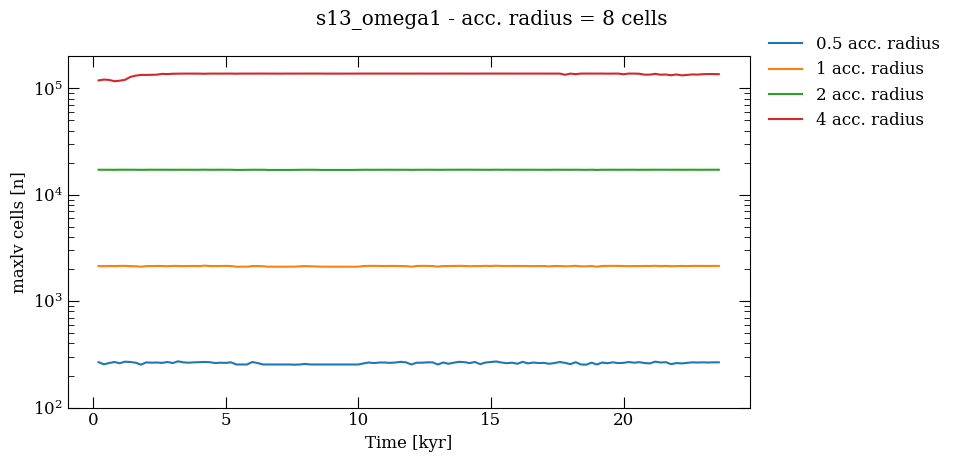

In [254]:
plot_simple_celllv(s13_om1, title = 's13_omega1 - acc. radius = 8 cells')

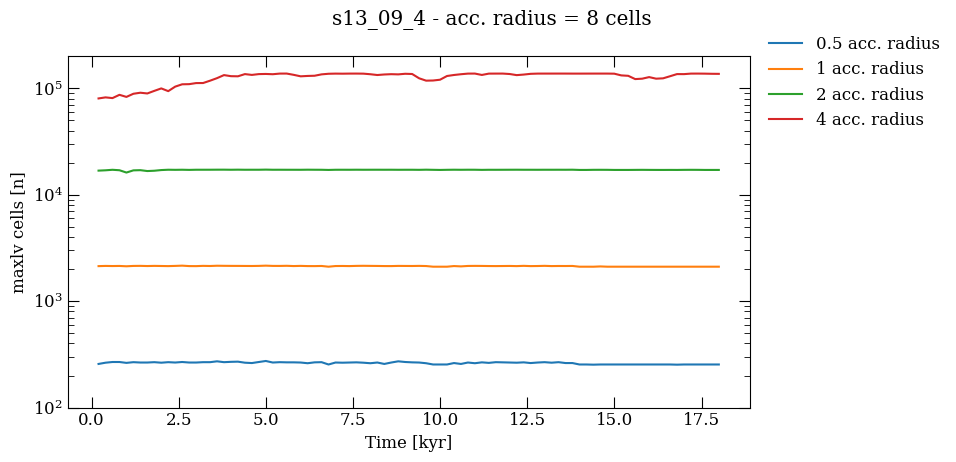

In [249]:
plot_simple_celllv(s13_a4, title = 's13_09_4 - acc. radius = 8 cells')

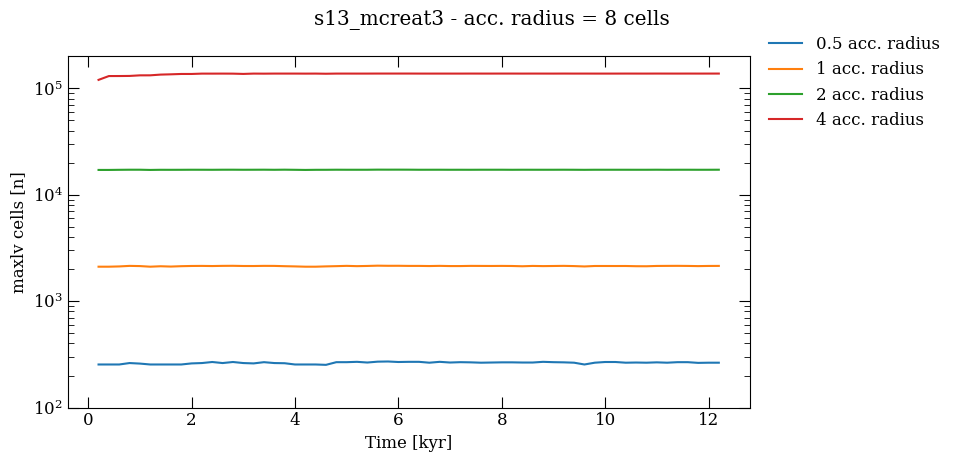

In [250]:
plot_simple_celllv(s13_mc3, title = 's13_mcreat3 - acc. radius = 8 cells')

In [192]:
def plot_cell_level(data, title, vmax = 1e5):

    bin_edges = np.arange(10.5, 20 + 1.5, 1)
    bin_centers = np.arange(11, 20 + 1., 1)
    
    time = data['time']

    hist2plot = np.zeros((len(time), 4, len(bin_centers)))

    for i in range(len(time)):
        for j, r in enumerate(np.array([4,8,16,32])):
            try:
                hist2plot[i,j,:], _ = np.histogram(data['radii_hist'][i][r], bins = bin_edges)
            except: 
                continue

    fig, axs = plt.subplots(2,2, figsize = (10,5), sharex=True, sharey=True)

    factor = [0.5, 1, 2, 4]

    for i, ax in zip(range(4), axs.flatten()):
        im = ax.pcolormesh(time*1e-3, bin_centers, hist2plot[:,i].T, norm=colors.SymLogNorm(linthresh=1, linscale=0.5, vmin=(0), vmax=vmax))
        if (i == np.array([0, 2])).any(): ax.set_ylabel('Cell level')
        if (i == np.array([2, 3])).any(): ax.set_xlabel('Time [kyr]')
        ax.text(0.99, 0.1, f'Acc. radius factor: {factor[i]}', transform=ax.transAxes, ha='right', va='top', fontsize = 12, color = 'white')

    fig.subplots_adjust(wspace=0.01, hspace=0.1)

    cbaxes = fig.add_axes([0.91, 0.125, 0.02, 0.675])
    cbar = fig.colorbar(im, cax = cbaxes)
    cbar.set_label('Cells [n]', labelpad = -10, y = 1.12,  rotation = 0, fontsize = 15)

    fig.suptitle(title, y =.95)

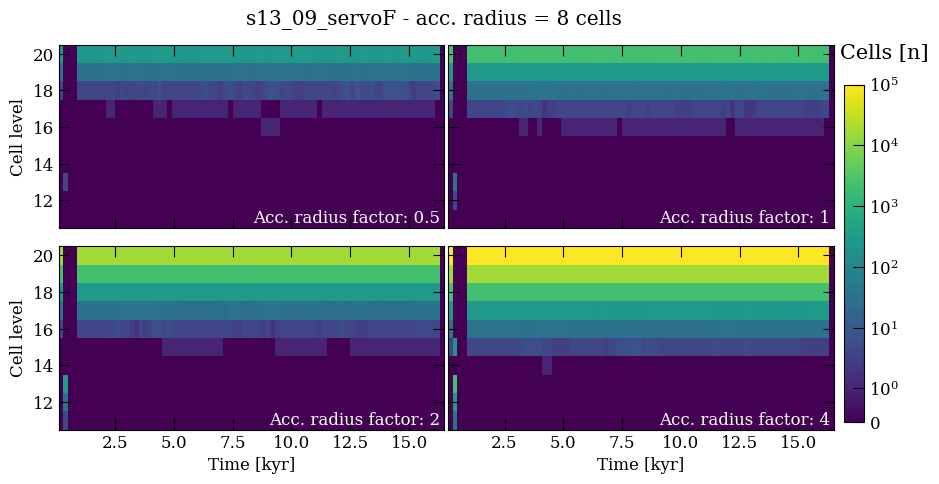

In [193]:
plot_cell_level(s13_sF, title = 's13_09_servoF - acc. radius = 8 cells')

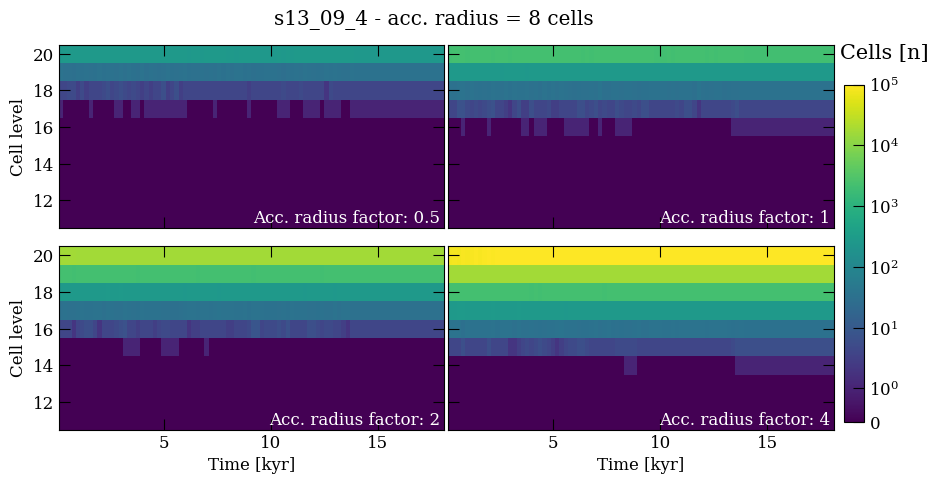

In [194]:
plot_cell_level(s13_a4, title = 's13_09_4 - acc. radius = 8 cells')

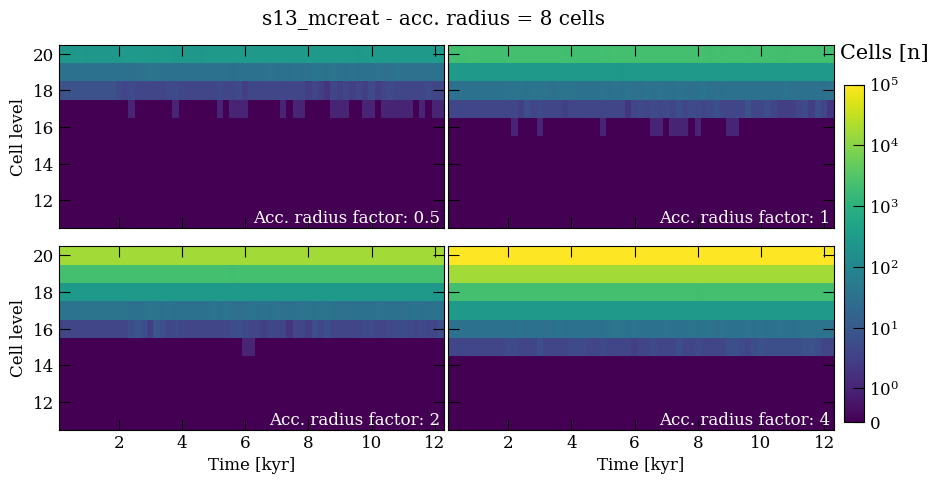

In [195]:
plot_cell_level(s13_mc3, title = 's13_mcreat - acc. radius = 8 cells')